In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import libraries 
import pickle

import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random

In [3]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [4]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


In [5]:
X_train.shape

(34799, 32, 32, 3)

In [6]:
y_train.shape

(34799,)

36

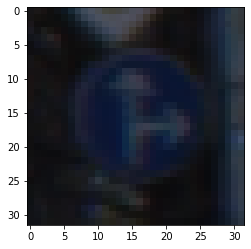

In [7]:
i = 1001
plt.imshow(X_train[i]) # Show images are not shuffled
y_train[i]

In [8]:
## Shuffle the dataset 
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)


In [9]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True) 

In [10]:
X_train_gray_norm = (X_train_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128


In [11]:
X_train_gray.shape

(34799, 32, 32, 1)

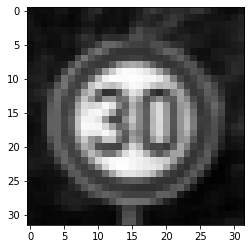

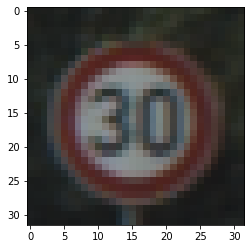

In [25]:
i = 50
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])


In [13]:
# Import train_test_split from scikit library
# Import Keras
# import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

# from subprocess import check_output
from sklearn.model_selection import train_test_split


In [14]:
image_shape = X_train_gray[i].shape

In [15]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32,3, 3, input_shape = image_shape, activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(32, activation = 'relu'))
cnn_model.add(Dense(43, activation = 'sigmoid'))


In [16]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [17]:
history = cnn_model.fit(X_train_gray_norm,
                        y_train,
                        batch_size=500,
                        epochs=50,
                        verbose=1,
                        validation_data = (X_validation_gray_norm,y_validation))

Epoch 1/50
70/70 [==============================] - 4s 22ms/step - loss: 3.4350 - accuracy: 0.0991 - val_loss: 3.3971 - val_accuracy: 0.1472
Epoch 2/50
70/70 [==============================] - 1s 20ms/step - loss: 2.9293 - accuracy: 0.2471 - val_loss: 2.9213 - val_accuracy: 0.2492
Epoch 3/50
70/70 [==============================] - 1s 20ms/step - loss: 2.4132 - accuracy: 0.3518 - val_loss: 2.5052 - val_accuracy: 0.3077
Epoch 4/50
70/70 [==============================] - 1s 20ms/step - loss: 2.0075 - accuracy: 0.4506 - val_loss: 2.1845 - val_accuracy: 0.3964
Epoch 5/50
70/70 [==============================] - 1s 19ms/step - loss: 1.7154 - accuracy: 0.5235 - val_loss: 1.9752 - val_accuracy: 0.4492
Epoch 6/50
70/70 [==============================] - 2s 22ms/step - loss: 1.5050 - accuracy: 0.5814 - val_loss: 1.8107 - val_accuracy: 0.5025
Epoch 7/50
70/70 [==============================] - 2s 22ms/step - loss: 1.3488 - accuracy: 0.6239 - val_loss: 1.6938 - val_accuracy: 0.5279
Epoch 8/50
70

In [18]:
score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.7329


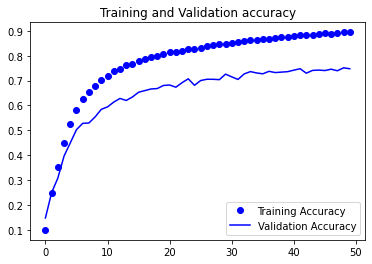

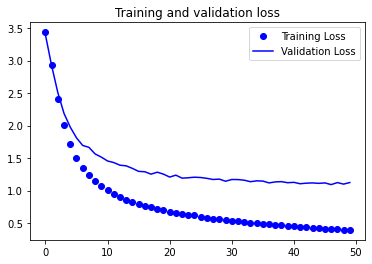

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [20]:
#get the predictions for the test data

# Deprecated way pre-Tensorflow 2.6:
#predicted_classes = cnn_model.predict_classes(X_test_gray_norm)

# New way:
predict_x = cnn_model.predict(X_test_gray_norm)
predicted_classes = np.argmax(predict_x, axis=1)

#get the indices to be plotted
y_true = y_test


In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
cm

array([[ 18,  24,   1, ...,   0,   0,   0],
       [137, 475,  30, ...,   5,   0,   0],
       [118, 107, 392, ...,   9,   0,   0],
       ...,
       [  0,   1,  16, ...,  25,   0,   4],
       [  0,   0,   2, ...,   0,  10,   1],
       [  0,   0,   0, ...,   0,   8,  52]], dtype=int64)

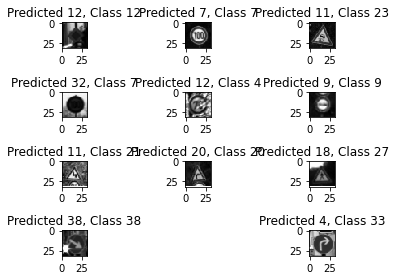

In [22]:
for i in range(0,12):
    plt.subplot(4,3,i+1)
    plt.imshow(X_test_gray_norm[i+10].squeeze(), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[i+10], y_true[i+10]))
    plt.tight_layout()